<a href="https://colab.research.google.com/github/PRAGYAMISHRA04/Time-series-analysis/blob/main/Mood_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Welcome to the Mood Classifier Project!!**
(Link to upload relevant blogs/youtube videos)

https://docs.google.com/document/d/16ZeQc7e_1J1PuoZqKB5_UCwfO3zNuRgTWQa3N-T5abE/edit

# Rules
##**1) If you have to add a feature/pipeline create a function so that it doesn't affect the other code**

##**2) Any updates or changes must be accompanied with a text cell before it describing the change made and date of changes**

##**3) Independent functions can be added anytime and you can also make a copy of the colab notebook and work with it as you prefer but make sure whenever you merge you document the changes**

##**4) Try to work on different cells so that you dont have to refresh all the time**

##**5) Also document your errors if any above your cell so others can know and help**

##**6) All the best**

## Libraries Import Pipeline

In [ ]:
! pip install datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 311 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 48.5 MB/s 
     |████████████████████████████████| 243 kB 59.4 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 133 kB 70.2 MB/s 
     |████████████████████████████████| 271 kB 64.4 MB/s 
     |████████████████████████████████| 144 kB 66.0 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 


In [ ]:
import seaborn as sns

# Importing dataset

In [ ]:
def import_data(name):
  dataset = load_dataset("emotion")
  train_data=pd.DataFrame(dataset[name])
  print(dataset)
  print(train_data.head())
  print(train_data.info())
  return train_data
dataset=import_data('train')

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None


In [ ]:
dataset

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


# **Labels and their Encoding**

> ## **Sadness :  0**

> ## **Joy     :  1**

> ## **Love    :  2**

> ## **Anger   :  3**

> ## **Fear    :  4**



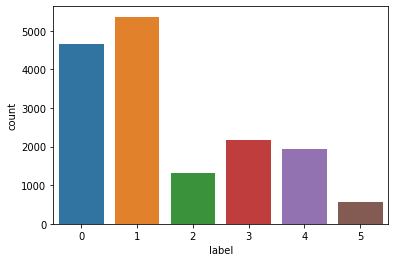

In [ ]:
sns.countplot(x=dataset['label'])

# Data Preprocesing Pipeline

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
df = dataset

In [ ]:
# changing text column to lower cases in processed_text col
# btw it has already been done in our emotion dataset
df['processed_text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['processed_text'].head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: processed_text, dtype: object

In [ ]:
# now we are removing punctuations from lower_text column
df['processed_text'] = df['processed_text'].str.replace('[^\w\s]','')
df['processed_text'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: processed_text, dtype: object

In [ ]:
# function to from to remove emojis
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['processed_text'] = df['processed_text'].apply(lambda x: remove_emoji(x))

In [ ]:
# remove stop words
stop = stopwords.words('english')
df['processed_text'] = df['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(5)

,text,label,processed_text
0,i didnt feel humiliated,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,feeling grouchy


In [ ]:
# LEMMATIZATION
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['processed_text']= df['processed_text'].apply(space)
df.head(5)

,text,label,processed_text
0,i didnt feel humiliated,0,do not feel humiliate
1,i can go from feeling so hopeless to so damned...,0,go feel hopeless damned hopeful around someone...
2,im grabbing a minute to post i feel greedy wrong,3,-PRON- be grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,3,feel grouchy


In [ ]:
def preprocessing(name): # name = train / test
  # Inside a function to use for test again
  nlp = spacy.load('en', disable=['parser', 'ner'])
  df = import_data(name)
  # changing text column to lower cases in processed_text col
  # btw it has already been done in our emotion dataset
  df['processed_text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
  df['processed_text'].head()
  # now we are removing punctuations from lower_text column
  df['processed_text'] = df['processed_text'].str.replace('[^\w\s]','')
  df['processed_text'].head()
  # function to from to remove emojis
  # REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
  def remove_emoji(text):
      emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags 
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
      return emoji_pattern.sub(r'', text)
  df['processed_text'] = df['processed_text'].apply(lambda x: remove_emoji(x))
  # remove stop words
  stop = stopwords.words('english')
  df['processed_text'] = df['processed_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df.head(5)
  # LEMMATIZATION
  def space(comment):
      doc = nlp(comment)
      return " ".join([token.lemma_ for token in doc])
  df['processed_text']= df['processed_text'].apply(space)
  df.head(5)
  return df

# Model Building and Training Pipeline

#**KNN ALGORITHM :**

In [ ]:
# KNN ALGO - ARYAN
 
from sklearn.neighbors import KNeighborsClassifier
CLASSIFIER = KNeighborsClassifier(n_neighbors= 10, metric= 'minkowski',algorithm ='auto', p=2 )

# Number of neighbors to use by default for kneighbors queries.
# default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
#  for algorithm-‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
# default -euclidean_distance (l2) for p = 2

CLASSIFIER.fit(x,y)

y_pred = CLASSIFIER.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix -equal to the number of observations known to be in group and predicted to be in group  
# set of labels predicted for a sample must exactly match the corresponding set of labels


A = confusion_matrix(y_test, y_pred)
B= accuracy_score(y_test, y_pred)

print(B) # - 0.5068 :(

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
# Split into training and testing data
x = df['processed_text']
y = df['label']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=50)
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
# NaiveBayes Nishkarsh
def NB():
  from sklearn.naive_bayes import MultinomialNB

  modelNB = MultinomialNB()
  modelNB.fit(x, y)
  print(modelNB.score(x_test, y_test))

In [ ]:
# Random Forest Classifier Nish

def RandomForest():
#Import Random Forest Model
  from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
  clf=RandomForestClassifier(n_estimators=100, oob_score = True)

#Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(x,y)

  y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
  from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**SVM**

In [ ]:
#Imports
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

#Model Training
def svm_fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=0)
    from sklearn.feature_extraction.text import TfidfVectorizer
    # Create feature vectors
    vectorizer = TfidfVectorizer(min_df = 5,
                                 max_df = 0.8,
                                 sublinear_tf = True,
                                 use_idf = True)
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='linear', probability=True, C=C, gamma=gamma)
    model2 = SVC(kernel='poly', probability=True, C=C, gamma=gamma)
    model3 = SVC(kernel='sigmoid', probability=True, C=C, gamma=gamma)
    # clf = model.fit(X_train, y_train)
    clf = model.fit(X_train,y_train)
    clf2 = model2.fit(X_train,y_train)
    clf3 = model3.fit(X_train,y_train)

    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)
    pred_labels_te2 = model2.predict(X_test)
    pred_labels_te3 = model3.predict(X_test)

    result = {'Linear Kernel': pred_labels_te,'Poly Kernel': pred_labels_te2,'Sigmoid Kernel': pred_labels_te3}
    return result



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU , Bidirectional, Dropout 
from tensorflow.keras.layers import Masking
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model
MAX_WORDS = 50000
MAX_SEQ_LENGTH = 100
EMBEDDING_DIM = 100
def act_LRELU(x):
  '''Leaky RELU'''
  return tf.nn.leaky_relu(x)
get_custom_objects().update({'lrelu': Activation(act_LRELU)})

def preprocessing_GRU(name):
  df = preprocessing(name)
  tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df['processed_text'].values)
  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  X = tokenizer.texts_to_sequences(df['processed_text'].values)
  X = pad_sequences(X, maxlen=MAX_SEQ_LENGTH)
  print('Shape of data tensor:', X.shape)
  Y=pd.get_dummies(df['label'])
  return X,Y

def build_model_GRU(shapes):
  model = Sequential()
  model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=shape[1]))
  model.add(Masking(mask_value=0.0,input_shape=(shapes[0],shapes[1])))
  model.add(Bidirectional(tf.keras.layers.GRU(128, activation='tanh', return_sequences=True)))
  model.add(Dropout(0.1))
  model.add(Bidirectional(tf.keras.layers.GRU(64, activation='tanh', return_sequences=False)))
  model.add(Dropout(0.1))
  model.add(Dense(1))
  #Compile model
  model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
  return model

X,Y=preprocessing_GRU()
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(" X_train ",X_train.shape," Y_train ",Y_train.shape)
print(X_val.shape,Y_val.shape)


X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
shape=X_train.shape
Model_adam=build_model_GRU(shape)
history=Model_adam.fit(x=X_train,y=Y_train,
                    validation_data=(X_val,Y_val),
                    epochs=1, batch_size=1024)
history=history.history
plot_model(build_model_GRU(shape))

X_test,Y_test = preprocessing_GRU('test')
accr = Model_adam.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Y_pred_GRU=Model_adam.predict(X_test)

Found 12358 unique tokens.
Shape of data tensor: (16000, 100)
(12800, 100) (12800, 6)
(3200, 100) (3200, 6)


# Model Testing 

In [ ]:
svm_fitting(df['processed_text'], df['label'], 1, 0.1)

{'Linear Kernel': array([3, 1, 0, ..., 0, 1, 3]),
 'Poly Kernel': array([1, 1, 1, ..., 1, 1, 1]),
 'Sigmoid Kernel': array([0, 1, 0, ..., 0, 1, 0])}

In [ ]:
RandomForest()

In [ ]:
NB()

#** **

## Model Selection by Comparision